# Assignment ---> 01

### Main Goal: 
    Have to extract those coustomers from the give csv.file who are capable to repay the loan on the basis of given data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/ml-dataset-1/Train.csv',low_memory=False)

In [3]:
print(df.columns)

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')


### **columns that are considered for extracting the insights from the main goal:**

1.**Client_Income**== for any financial firm to lend the money to its coustomers its very obvious to ask the recipients income status.

2.**Car_owned and Bike_owned and House_Own** == this also adds as an asset of a client information of which is very necessary for any banks.

3.**Active_Loan** == this helps banks to figure out the performance of the client in the previous bank and capabilities of the same for getting the new loan.

4.**Client_Family_Members** == this column tells how much does the person is spending on his family.And how much would remain to repay the loan.(But not the actual mesure to answer our goal)
and many other

In [4]:
df.sample(10)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
81664,12139012,20700,NaN,0.0,1.0,1.0,0.0,55255.5,3010.5,NaN,...,Yes,Yes,XNA,NaN,0.443552,0.631354537,NaN,699.0,5.0,1
28214,12218051,27000,0.0,1.0,1.0,1.0,1.0,33750,1687.5,Alone,...,Yes,Yes,Business Entity Type 2,NaN,0.627679,0.216402961,0.1320,702.0,0.0,0
12278,12172539,18000,0.0,0.0,0.0,1.0,0.0,42786.9,3380.4,Alone,...,Yes,Yes,Trade: type 7,NaN,0.344315,NaN,0.0825,444.0,5.0,0
39981,12219808,13500,0.0,NaN,0.0,1.0,1.0,86322.6,3670.2,Relative,...,No,Yes,Industry: type 11,NaN,0.756789,0.52629494,NaN,1580.0,0.0,1
22525,12111629,23850,0.0,0.0,0.0,1.0,2.0,112500,3302.55,Kids,...,Yes,No,NaN,0.506272,0.718279,0.231439351,0.4938,1591.0,0.0,0
36572,12134201,5400,0.0,0.0,1.0,1.0,0.0,15750,787.5,Relative,...,Yes,No,Housing,NaN,NaN,NaN,NaN,1961.0,0.0,0
12866,12176697,12150,0.0,1.0,1.0,1.0,1.0,59590.35,2637.9,Alone,...,Yes,Yes,Government,NaN,0.709827,0.614414378,NaN,2781.0,1.0,0
6110,12200157,9000,0.0,1.0,1.0,0.0,0.0,15282,994.95,Alone,...,Yes,No,Business Entity Type 3,0.226632,0.732306,NaN,NaN,1687.0,NaN,0
1669,12105856,6750,0.0,1.0,0.0,1.0,0.0,75519,3007.8,Partner,...,Yes,Yes,XNA,NaN,0.507087,0.758393062,NaN,0.0,0.0,0
34865,12200302,27000,1.0,0.0,1.0,1.0,1.0,142840.8,8752.05,Alone,...,Yes,No,Business Entity Type 3,0.402846,0.473638,0.488455184,0.2371,1807.0,3.0,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97484 entries, 0 to 97483
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          97484 non-null  int64  
 1   Client_Income               94575 non-null  object 
 2   Car_Owned                   94598 non-null  float64
 3   Bike_Owned                  94575 non-null  float64
 4   Active_Loan                 94572 non-null  float64
 5   House_Own                   94594 non-null  float64
 6   Child_Count                 94543 non-null  float64
 7   Credit_Amount               94570 non-null  object 
 8   Loan_Annuity                93662 non-null  object 
 9   Accompany_Client            96079 non-null  object 
 10  Client_Income_Type          94538 non-null  object 
 11  Client_Education            94547 non-null  object 
 12  Client_Marital_Status       94710 non-null  object 
 13  Client_Gender               955

In [6]:
df_1 = df.iloc[:,:7]
print(df_1.describe())

                 ID     Car_Owned    Bike_Owned   Active_Loan     House_Own  \
count  9.748400e+04  94598.000000  94575.000000  94572.000000  94594.000000   
mean   1.216094e+07      0.342957      0.332339      0.497970      0.692761   
std    3.517269e+04      0.474700      0.471054      0.499999      0.461352   
min    1.210000e+07      0.000000      0.000000      0.000000      0.000000   
25%    1.213056e+07      0.000000      0.000000      0.000000      0.000000   
50%    1.216091e+07      0.000000      0.000000      0.000000      1.000000   
75%    1.219140e+07      1.000000      1.000000      1.000000      1.000000   
max    1.222186e+07      1.000000      1.000000      1.000000      1.000000   

        Child_Count  
count  94543.000000  
mean       0.418254  
std        0.728858  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max       19.000000  


**** Here I can clerly see that there are too many missing datas which might be a problem while processing,so we will use data handling methods to get the processable data out of it. ****

In [7]:
print(df.isnull().sum())

ID                                0
Client_Income                  2909
Car_Owned                      2886
Bike_Owned                     2909
Active_Loan                    2912
House_Own                      2890
Child_Count                    2941
Credit_Amount                  2914
Loan_Annuity                   3822
Accompany_Client               1405
Client_Income_Type             2946
Client_Education               2937
Client_Marital_Status          2774
Client_Gender                  1900
Loan_Contract_Type             2921
Client_Housing_Type            2933
Population_Region_Relative     3842
Age_Days                       2873
Employed_Days                  2956
Registration_Days              2858
ID_Days                        4796
Own_House_Age                 64081
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             33048
Client_Family_Members          1935
Cleint_City_Rating          

## 1.DATA PRE-PROCESSING AND DATA ANALYSIS:

In [8]:
income_type_counts = df['Client_Income_Type'].value_counts()
total_clients = income_type_counts.sum()
income_type_proportions = (income_type_counts / total_clients) * 100

income_summary = pd.DataFrame({
    'Count': income_type_counts,
    'Proportion (%)': income_type_proportions
})

print(income_summary)


# 1. Identifying the most common income type
most_common_income_type = income_summary['Count'].idxmax()
most_common_income_count = income_summary['Count'].max()
print(f"\nMost Common Income Type: {most_common_income_type} ({most_common_income_count} clients)")

# 2. Finding income types with less than a certain threshold
threshold = 10  
low_income_types = income_summary[income_summary['Count'] < threshold]
print("\nIncome Types with Less Than {} Clients:\n{}".format(threshold, low_income_types))

# 3. Identifying key insights based on the summary
for income_type, row in income_summary.iterrows():
    if row['Proportion (%)'] > 20:
        print(f"\nKey Insight: {income_type} makes up {row['Proportion (%)']:.2f}% of the client base.")

                    Count  Proportion (%)
Client_Income_Type                       
Service             48857       51.679748
Commercial          22269       23.555607
Retired             16765       17.733610
Govt Job             6632        7.015169
Student                 6        0.006347
Unemployed              6        0.006347
Maternity leave         2        0.002116
Businessman             1        0.001058

Most Common Income Type: Service (48857 clients)

Income Types with Less Than 10 Clients:
                    Count  Proportion (%)
Client_Income_Type                       
Student                 6        0.006347
Unemployed              6        0.006347
Maternity leave         2        0.002116
Businessman             1        0.001058

Key Insight: Service makes up 51.68% of the client base.

Key Insight: Commercial makes up 23.56% of the client base.


### A.Age Distribution:

In [9]:
#converting Age_days(object) data to int.type 

# Convert column to numeric, setting invalid parsing to NaN
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')

# Handle NaN values 
df['Age_Days'] = df['Age_Days'].fillna(0)  # Replace NaN with 0

# Now convert the column to integer type
df['Age_Days'] = df['Age_Days'].astype(int)

# converting the days into years 

df['Age_Days'] = df['Age_Days']//365
print(df['Age_Days'])

0        38
1        60
2        33
3        42
4        41
         ..
97479    23
97480    42
97481    59
97482    36
97483    43
Name: Age_Days, Length: 97484, dtype: int64


### B.Preprocessing of Client_Income, Client_Gender, Client_Age for visualization:

In [10]:
# converting float data_type of Client_Income and Credit_Amount to integer data_type

df['Client_Income'] = df['Client_Income'].fillna(0).replace('$',0).astype(float)
df['Client_Income'] = df['Client_Income'].astype(int)


In [11]:
# coverting the data Client_Income and Age_days to acceptable input for for preprocessing

Client_Income = (df["Client_Income"]).values.reshape(-1, 1)
Age_Days = df["Age_Days"].values.reshape(-1, 1)


In [12]:
# Using pandas operations that avoid intermediate large arrays
df['ratio'] = df['Client_Income'] / df['Client_Family_Members']

# To avoid memory issues, calculate percentage and min in chunks
df['percentage'] = (df['ratio'] / df['Client_Income']) * 100

df['percentage']

0         25.000000
1        100.000000
2               NaN
3        100.000000
4        100.000000
            ...    
97479     50.000000
97480     50.000000
97481     50.000000
97482     33.333333
97483           NaN
Name: percentage, Length: 97484, dtype: float64

In [13]:
# Convert Loan_Annuity to numeric
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

# Check if there are any NaN values 
df['Loan_Annuity'] = df['Loan_Annuity'].fillna(0)  

# Loan_Annuity_Percentage column
df['Loan_Annuity_Percentage'] = (df['Loan_Annuity'] / df['Loan_Annuity'].sum()) * 1000000
print(df[['Loan_Annuity', 'Loan_Annuity_Percentage']])

       Loan_Annuity  Loan_Annuity_Percentage
0           2498.40                 9.796136
1              0.00                 0.000000
2           1102.95                 4.324627
3           2879.55                11.290611
4           3740.40                14.665973
...             ...                      ...
97479       2619.45                10.270769
97480       3526.65                13.827867
97481       2541.15                 9.963757
97482       3165.30                12.411027
97483       5153.40                20.206295

[97484 rows x 2 columns]


In [14]:
percentage = df['percentage'].values.reshape(-1, 1)
percentage = percentage.ravel()
Loan_Annuity_Percentage = df['Loan_Annuity_Percentage'].values.reshape(-1, 1)
Loan_Annuity_Percentage = Loan_Annuity_Percentage.ravel()

In [15]:
df['Client_Gender'] = df['Client_Gender'].fillna("Female")
gender_proportion = df['Client_Gender'].value_counts(normalize=True)
print(gender_proportion)

Client_Gender = df['Client_Gender']

Client_Gender
Male      0.644116
Female    0.355853
XNA       0.000031
Name: proportion, dtype: float64


In [16]:
Client_Income = Client_Income.ravel()  # Convert to 1D
Age_Days = Age_Days.ravel()  # Convert to 1D
Client_Gender = Client_Gender.ravel()  # Convert to 1D if it's also multi-dimensional


/tmp/ipykernel_30/336740562.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Client_Gender = Client_Gender.ravel()  # Convert to 1D if it's also multi-dimensional


In [17]:
# checking the shape of the data to check the compatibility of the inputs for visualization

print(f"After reshaping:-\nshape of client income:{np.shape(Client_Income)}\nshape of client age:{np.shape(Age_Days)}\nshape of client gender:{np.shape(Client_Gender)}")


After reshaping:-
shape of client income:(97484,)
shape of client age:(97484,)
shape of client gender:(97484,)


## 2.VISUALIZATIONS:

<Axes: xlabel='Age_Days'>

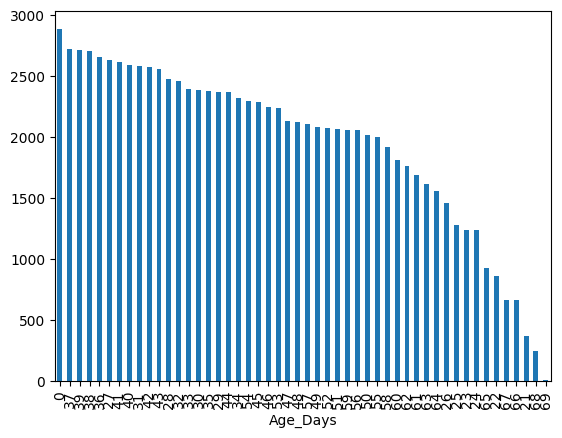

In [18]:
df['Age_Days'].value_counts().plot(kind='bar')


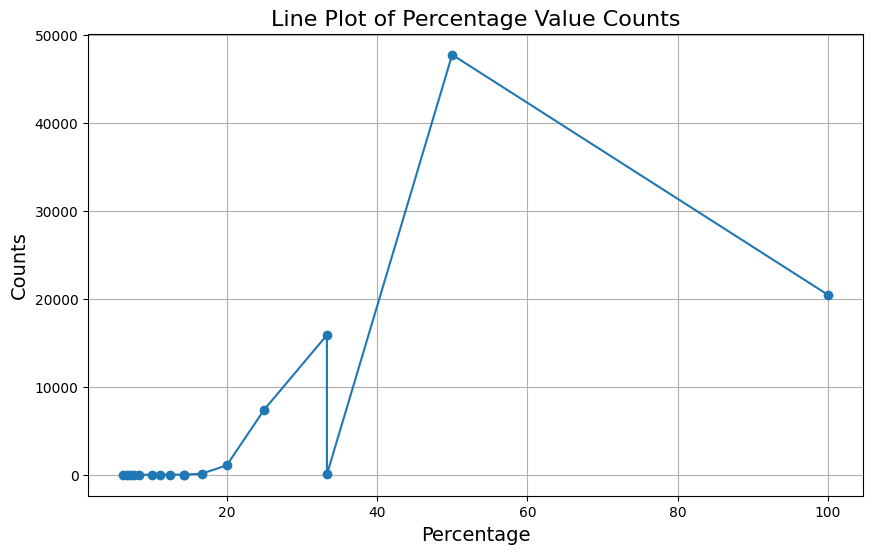

In [19]:
# Calculate the value counts of the 'percentage' column
percentage_counts = df['percentage'].value_counts()

# Sort the value counts for better visualization (optional)
percentage_counts = percentage_counts.sort_index()

# Plot the value counts as a curve (line plot)
percentage_counts.plot(kind='line', figsize=(10, 6), marker='o')

# Adding titles and labels
plt.title('Line Plot of Percentage Value Counts', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Counts', fontsize=14)

# Show the plot
plt.grid(True)  # Optional: adds a grid for better readability
plt.show()

/tmp/ipykernel_30/282436561.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Loan_Annuity_Percentage'], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


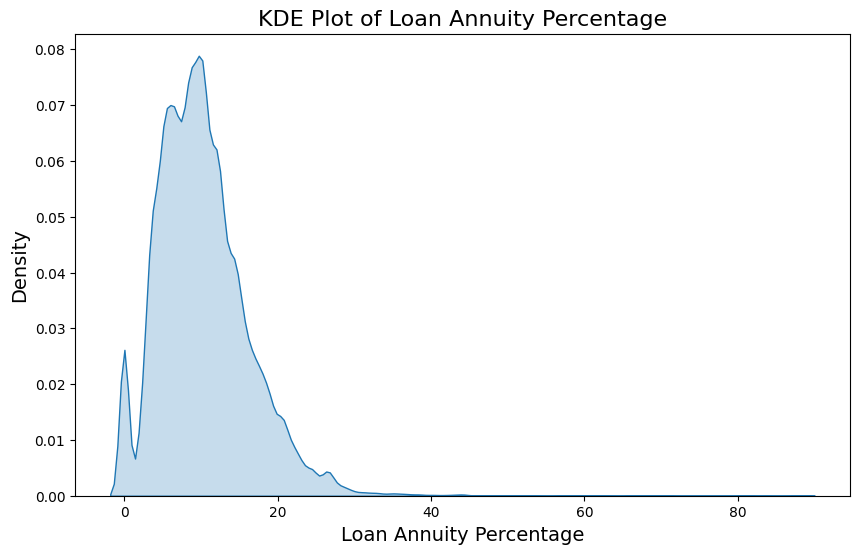

In [20]:
# Plot a KDE (Kernel Density Estimate) plot for a smoother distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Loan_Annuity_Percentage'], shade=True)

# Add labels and titles
plt.title('KDE Plot of Loan Annuity Percentage', fontsize=16)
plt.xlabel('Loan Annuity Percentage', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

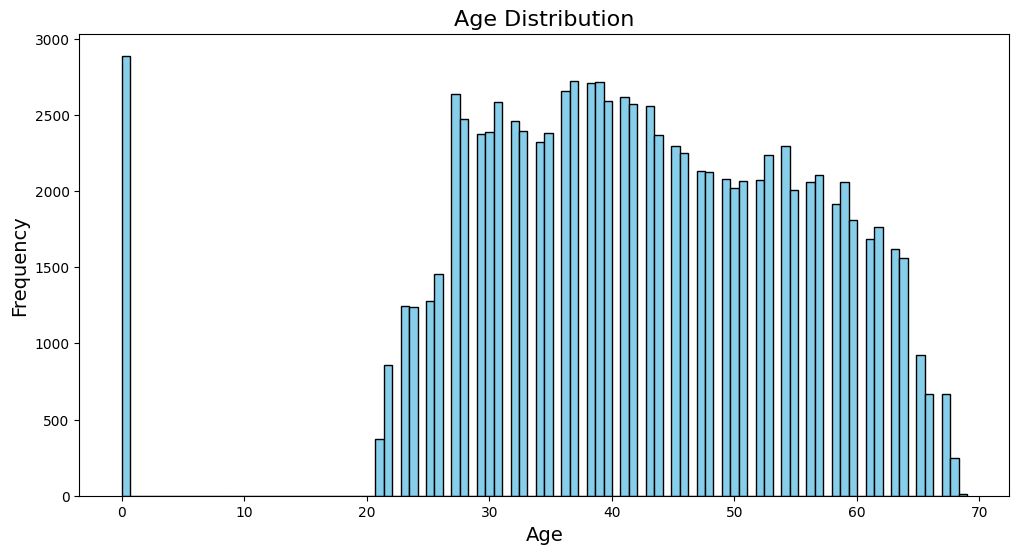

In [21]:
# Plot histogram
plt.figure(figsize=(12, 6))  # Set the figure size to make it wider
plt.hist(df['Age_Days'], bins=100, edgecolor='black', color='skyblue')  # Wider bins for a large dataset
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

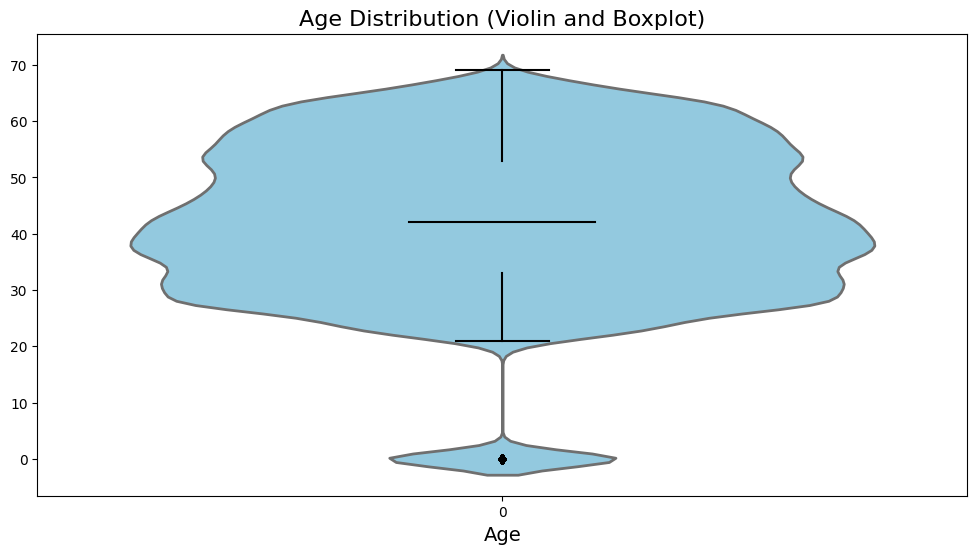

In [22]:
# Plot combined violin and boxplot
plt.figure(figsize=(12, 6))
sns.violinplot(df['Age_Days'], inner=None, color='skyblue', linewidth=2)
sns.boxplot(df['Age_Days'], whis=1.5, width=0.2, color='black')
plt.title('Age Distribution (Violin and Boxplot)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.show()

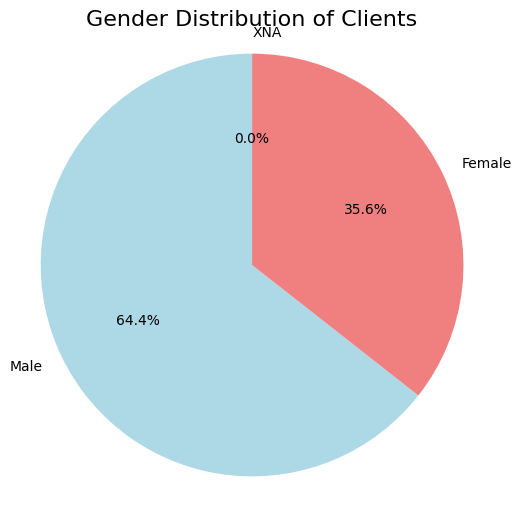

In [23]:
# Compute the value counts for Client_Gender
gender_counts = df['Client_Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')  

# Add a title
plt.title('Gender Distribution of Clients', fontsize=16)

# Show the plot
plt.show()

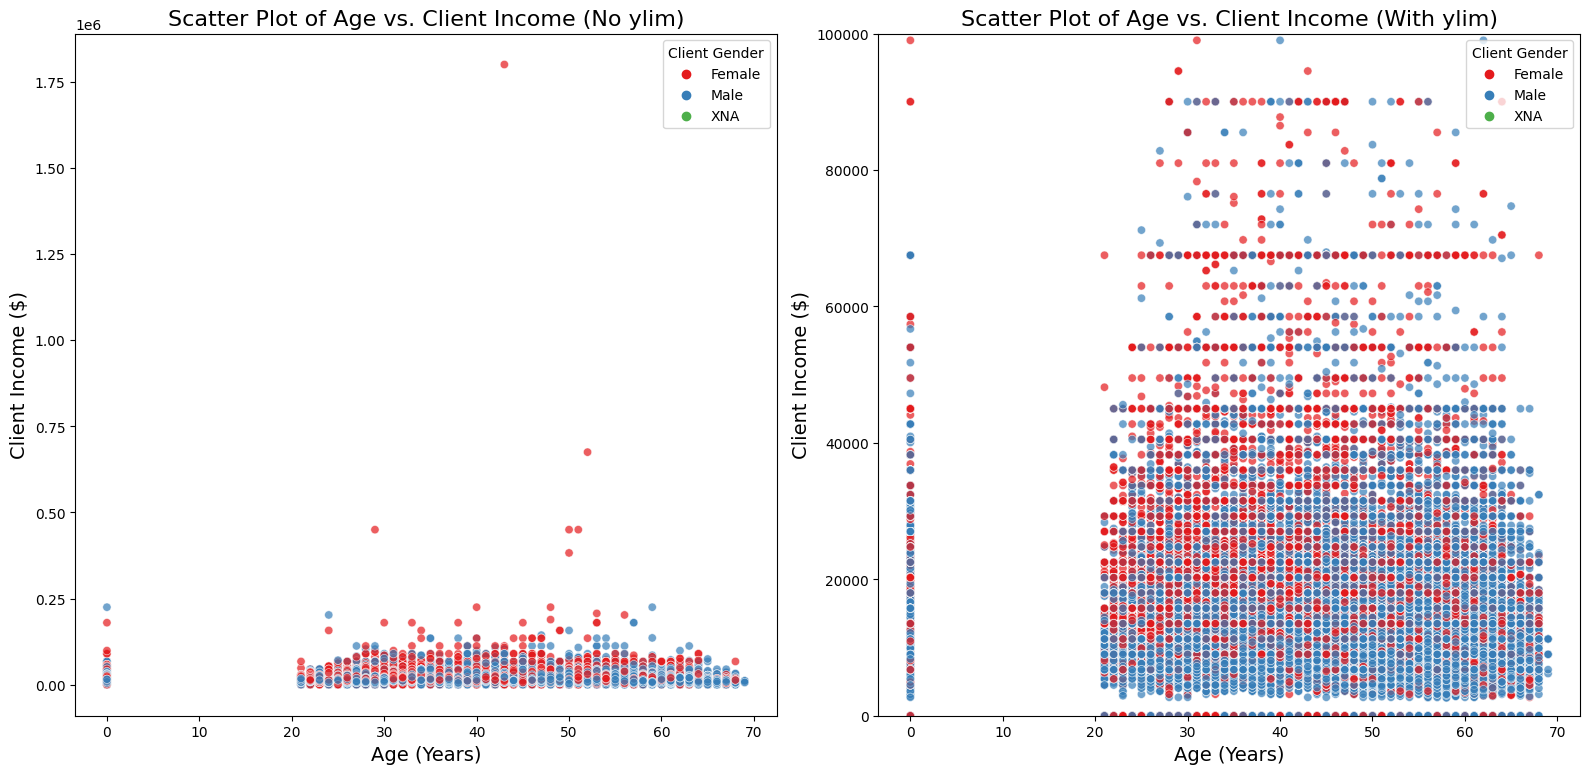

In [24]:
# Create a DataFrame for visualization
df = pd.DataFrame({
    'Client_Income': Client_Income,
    'Age': Age_Days,
    'Client_Gender': Client_Gender
})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# First subplot: Without ylim
sns.scatterplot(data=df, x='Age', y='Client_Income', hue='Client_Gender', palette='Set1', alpha=0.7, ax=axes[0])
axes[0].set_title('Scatter Plot of Age vs. Client Income (No ylim)', fontsize=16)
axes[0].set_xlabel('Age (Years)', fontsize=14)
axes[0].set_ylabel('Client Income ($)', fontsize=14)
axes[0].legend(title='Client Gender', loc='upper right')

# Second subplot: With ylim
sns.scatterplot(data=df, x='Age', y='Client_Income', hue='Client_Gender', palette='Set1', alpha=0.7, ax=axes[1])
axes[1].set_ylim(0, 100000)
axes[1].set_title('Scatter Plot of Age vs. Client Income (With ylim)', fontsize=16)
axes[1].set_xlabel('Age (Years)', fontsize=14)
axes[1].set_ylabel('Client Income ($)', fontsize=14)
axes[1].legend(title='Client Gender', loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## 3.MODELLING:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
df = pd.read_csv('/kaggle/input/ml-dataset-1/Train.csv',low_memory=False)

In [27]:
Client_Income_Type = df['Client_Income_Type'].values.reshape(1,-1)
Client_Income_Type = Client_Income_Type.ravel()

In [28]:
from sklearn.preprocessing import OrdinalEncoder

# Fill missing values with 'Service'
df['Client_Income_Type'] = df['Client_Income_Type'].fillna('Service')

# Create OrdinalEncoder with defined categories
oe = OrdinalEncoder(categories=[["Service", 'Commercial', 'Retired', 'Govt Job', 'Student', 'Unemployed', 'Maternity leave', 'Businessman']])

# Reshape the column to be 2D and apply OrdinalEncoder
df['Client_Income_Type_Encoded'] = oe.fit_transform(df['Client_Income_Type'].values.reshape(-1, 1))

# View the result
print(df[['Client_Income_Type', 'Client_Income_Type_Encoded']].head())

  Client_Income_Type  Client_Income_Type_Encoded
0            Service                         0.0
1            Retired                         2.0
2           Govt Job                         3.0
3            Service                         0.0
4         Commercial                         1.0


In [29]:
Client_Education_counts = df['Client_Education'].value_counts()
Client_Education_counts

Client_Education
Secondary             67107
Graduation            23117
Graduation dropout     3117
Junior secondary       1155
Post Grad                51
Name: count, dtype: int64

In [30]:
df['Client_Education'] = df['Client_Education'].fillna('Graduation')

# Create OrdinalEncoder with defined categories
oe = OrdinalEncoder(categories=[["Secondary", 'Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad']])

# Reshape the column to be 2D and apply OrdinalEncoder
df['Client_Education_Encoded'] = oe.fit_transform(df['Client_Education'].values.reshape(-1, 1))

# View the result
print(df[['Client_Education', 'Client_Education_Encoded']].head())

  Client_Education  Client_Education_Encoded
0       Graduation                       1.0
1        Secondary                       0.0
2        Secondary                       0.0
3        Secondary                       0.0
4       Graduation                       1.0


In [31]:
df['Client_Gender'] = df['Client_Gender'].fillna('Female')

# Create OrdinalEncoder with defined categories
oe = OrdinalEncoder(categories=[['Female','Male',"XNA"]])
# Reshape the column to be 2D and apply OrdinalEncoder
df['Client_Gender_Encoded'] = oe.fit_transform(df['Client_Gender'].values.reshape(-1, 1))

# View the result
print(df[['Client_Gender', 'Client_Gender_Encoded']].head())

  Client_Gender  Client_Gender_Encoded
0        Female                    0.0
1        Female                    0.0
2          Male                    1.0
3          Male                    1.0
4          Male                    1.0


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

mini_feature = ['Score_Source_1', 'Score_Source_2', 'Score_Source_3','Client_Gender_Encoded','Client_Education_Encoded','Client_Income_Type_Encoded']
target = 'Default'

# Convert to numeric, coercing errors to NaN
for feature in mini_feature:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Fill NaN values
df[mini_feature] = df[mini_feature].fillna(df[mini_feature].mean())

# Prepare feature matrix and target vector
X = df[mini_feature]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17956     0]
 [ 1541     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     17956
           1       0.00      0.00      0.00      1541

    accuracy                           0.92     19497
   macro avg       0.46      0.50      0.48     19497
weighted avg       0.85      0.92      0.88     19497



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
